# Simple Pendulum
For a simple pendulum, the equation of motion can be written as,

$$ \frac{d^2 \theta}{dt^2} = - \frac{g}{L} \sin(\theta) - \frac{K}{m} \frac{d\theta}{dt} $$

Where, $\theta$ is the angle between the rod and the y-axis, $K$ is the air-resistance factor, $m$ is the mass of the bob, $L$ is the length of the rod, and $g$ is the acceleration due to gravity.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation

In our case, we set $L$ and $m$ as 1. We set $g = 9.81$. We also set $K = 0.5$. Also, initially we set the pendulum to start at an angle $\theta_0 = \frac{\pi}{4}$

In [60]:
L = 1
m = 1 
K = 0.5
g = 9.81
the_0 = np.pi + 0.00001

In [61]:
def dSdt(S,t):
    the, u = S
    return [
        u,
        -((g / L) * np.sin(the)) - ((K / m) * u)
    ]

In [62]:
t = np.linspace(0,50,1000)

In [63]:
sols = odeint(dSdt, y0 = [the_0, 0], t = t)

After Solving the differential equation numerically, using trigonometry we find the x and y coordinates of the bob to be $x = L \sin\theta$ and $y = -L\cos\theta$

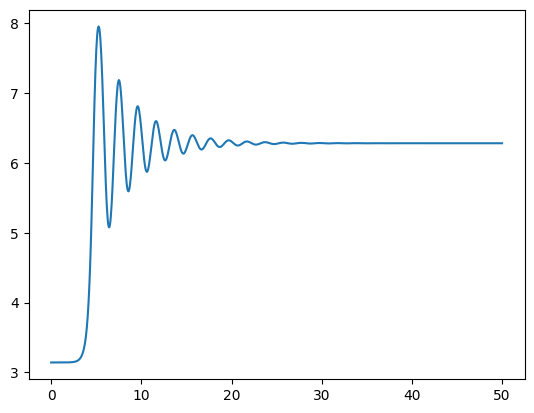

In [64]:
plt.plot(t, sols.T[0])

In [65]:
x = L * np.sin(sols.T[0])
y = - L * np.cos(sols.T[0])

Let's plot the x and y coordinates of the bob v/s time

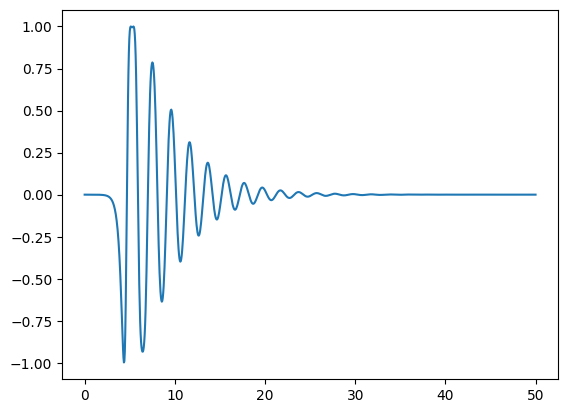

In [66]:
plt.plot(t,x)

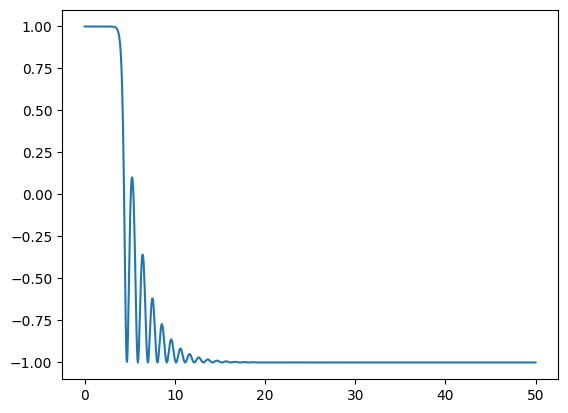

In [67]:
plt.plot(t,y)

As we can see, in both cases, the amplitude slowly dcreases over time. This is because of the non-zero air-resistance term ($K \neq 0$)

Now, we animate it, using the obtained x and y coordinates.

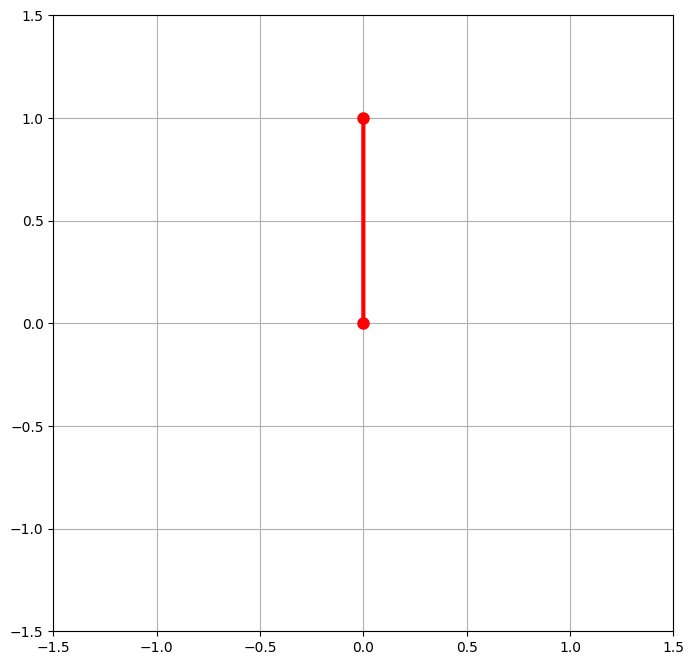

In [68]:
def animate(i):
    ln1.set_data([x[i],0],[y[i],0])
fig,ax = plt.subplots(1,1, figsize=(8,8))
ax.grid()
ln1, = plt.plot([],[], 'ro-', lw=3, markersize=8)
ax.set_ylim(-1.5,1.5)
ax.set_xlim(-1.5,1.5)
ani = animation.FuncAnimation(fig, animate, frames=500, interval=50)
ani.save('pendu.gif', writer='pillow', fps=30)